<a href="https://colab.research.google.com/github/Ubaidb936/Association-Rule-Learning-From-Scratch-on-the-super-market-dataset/blob/main/CS_205_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predicting Gold Prices
> Authors:
> 
> Rajat Jain - rjain032
> 
> Jamella Suzanne Pescasio - jpesc002
>
> Ubaid Ul Majied - umaji001

## The Question
Much like the stock market, gold prices tend to fluctuate given some number of conditions. What we want to achieve is answering this question: **what is the best way to predict the price of gold?**

## The Data
Our data consists of market information of different commodities, since 2016. All data is provided by [Yahoo Finance](https://pypi.org/project/yfinance/).

The dataset we will be using consists of about **1500 data points**.

## The Approach
Since there can be many possible factors that could affect the price of gold, we want to test several features that may help us build a more accurate model to predict the price of gold. 

We will use some feature selection methods like **variance threshold** and **Pearson's correlation** to help determine the best features. And we will experiment with **linear regression** to test and train our model.

## Our Hypothesis
We expect linear regression to do fairly well, assuming we will be able to find some optimal features to help predict the price of gold. From some preliminary research, we also expect some good features to include **value of the U.S. dollar** and **market volatility**.

See more information about what drives the price of gold here: [https://www.investopedia.com/financial-edge/0311/what-drives-the-price-of-gold.aspx](https://www.investopedia.com/financial-edge/0311/what-drives-the-price-of-gold.aspx).

## Basic Setup
We first load some basic libraries like **pandas**, **numpy**, **matplotlib**, and **sklearn** which will help us organize the data, generate figures, and build our model to predict gold prices in this project.

We also load **yfinance** which provides all the data we will be using.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib.pyplot import figure
from matplotlib import pyplot as plt
plt.style.use('seaborn-darkgrid')
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import VarianceThreshold

# yahoo finance is used to fetch data
!pip install yfinance
import yfinance as yf

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 1.1 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0


## Setting Up the Data
For this project, we will mainly pull the market information of gold, silver, platinum, U.S. oil, volatility index, and U.S. dollars.

***How would the results differ if more commodities were included?***

Below, we pull the data using yfinance, drop missing values, organize the column names for each commodity, and combine them all together in one dataframe.

In [ ]:
# Read data
gldDF = yf.download('GC=F', '2016-01-01', '2022-01-01', auto_adjust=True) # gold
slvDF = yf.download('SI=F', '2016-01-01', '2022-01-01', auto_adjust=True) # silver
pltDF = yf.download('PL=F', '2016-01-01', '2022-01-01', auto_adjust=True) # platinum
usoDF = yf.download('USO', '2016-01-01', '2022-01-01', auto_adjust=True) # US oil
vixDF = yf.download('^VIX', '2016-01-01', '2022-01-01', auto_adjust=True) # volatility index
usdDF = yf.download('DX-Y.NYB', '2016-01-01', '2022-01-01', auto_adjust=True) # USD index

# Drop rows with missing values
gldDF = gldDF.dropna()
slvDF = slvDF.dropna()
pltDF = pltDF.dropna()
usoDF = usoDF.dropna()
vixDF = vixDF.dropna()
usdDF = usdDF.dropna()

# Combine data into one DF
gldDF.columns = ['GLDOPEN','GLDHIGH','GLDLOW','GLDCLOSE','GLDVOL']
slvDF.columns = ['SLVOPEN','SLVHIGH','SLVLOW','SLVCLOSE','SLVVOL']
pltDF.columns = ['PLTOPEN','PLTHIGH','PLTLOW','PLTCLOSE','PLTVOL']
usoDF.columns = ['USOOPEN','USOHIGH','USOLOW','USOCLOSE','USOVOL']
vixDF.columns = ['VIXOPEN','VIXHIGH','VIXLOW','VIXCLOSE','VIXVOL']
usdDF.columns = ['USDOPEN','USDHIGH','USDLOW','USDCLOSE','USDVOL']
combinedDF = pd.concat([gldDF, slvDF, pltDF, usoDF, vixDF, usdDF], axis=1)
combinedDF.tail()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,GLDOPEN,GLDHIGH,GLDLOW,GLDCLOSE,GLDVOL,SLVOPEN,SLVHIGH,SLVLOW,SLVCLOSE,SLVVOL,...,VIXOPEN,VIXHIGH,VIXLOW,VIXCLOSE,VIXVOL,USDOPEN,USDHIGH,USDLOW,USDCLOSE,USDVOL
Date,,,,,,,,,,,,,,,,,,,,,
2021-12-27,1810.000000,1812.099976,1807.000000,1808.099976,150.0,22.680000,22.980000,22.680000,22.979000,3.0,...,19.370001,19.410000,17.549999,17.680000,0.0,96.150002,96.260002,96.050003,96.089996,0.0
2021-12-28,1812.000000,1818.000000,1805.500000,1810.199951,146.0,23.055000,23.295000,23.055000,23.111000,154.0,...,17.780001,18.469999,17.510000,17.540001,0.0,96.070000,96.279999,96.000000,96.199997,0.0
2021-12-29,1803.199951,1805.099976,1791.400024,1805.099976,623.0,23.004999,23.004999,22.635000,22.848000,264.0,...,17.629999,18.000000,16.709999,16.950001,0.0,96.150002,96.400002,95.760002,95.930000,0.0
2021-12-30,1801.699951,1816.000000,1796.000000,1812.699951,306.0,22.775000,23.084999,22.620001,23.028000,194.0,...,17.299999,17.790001,16.620001,17.330000,0.0,95.889999,96.220001,95.860001,95.970001,0.0
2021-12-31,1825.099976,1827.800049,1821.400024,1827.500000,80.0,23.225000,23.327999,23.200001,23.327999,86.0,...,17.629999,18.270000,16.990000,17.219999,0.0,95.989998,96.110001,95.570000,95.669998,0.0


## Observing the Data
One of the most important steps in building a model is taking a look into your data. So, we could simply start off by plotting the closing price of each commodity we currently have.

***Do you notice any correlations/trends between any commodities?***

***Does the price of any one commodity seem to affect the closing price of gold?***

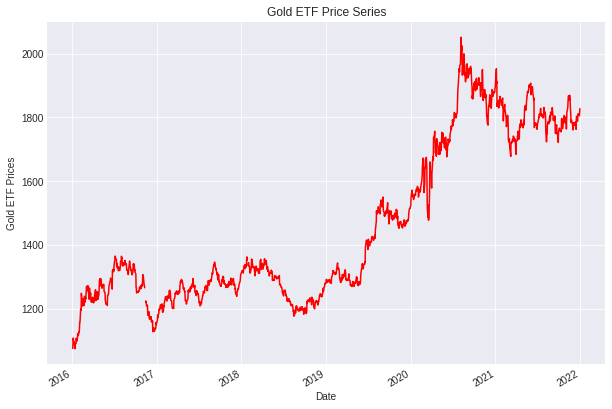

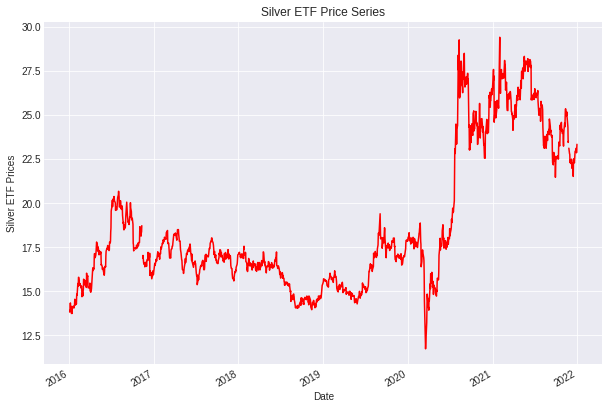

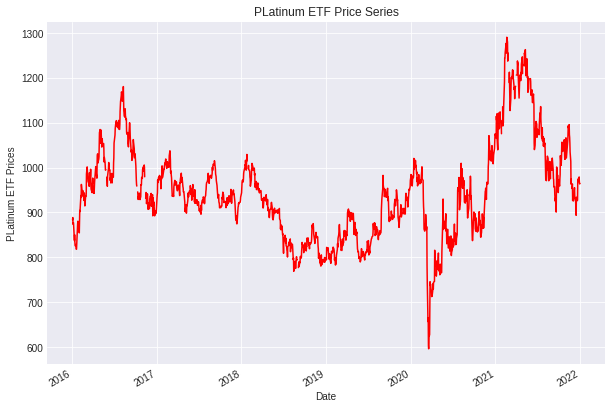

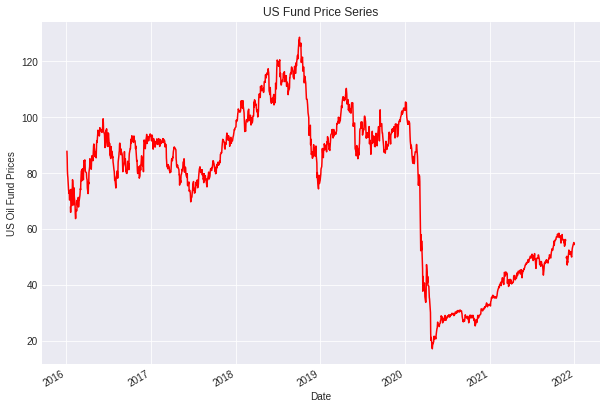

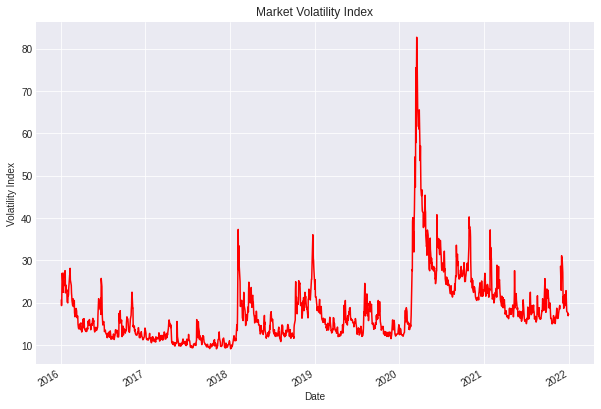

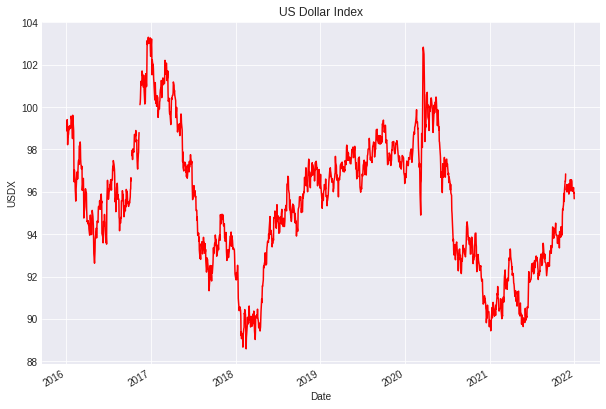

In [ ]:
# Plot the closing price of GLD
combinedDF.GLDCLOSE.plot(figsize=(10, 7),color='r')
plt.ylabel("Gold ETF Prices")
plt.title("Gold ETF Price Series")
plt.show()

# Plot the closing price of SLV
combinedDF.SLVCLOSE.plot(figsize=(10, 7),color='r')
plt.ylabel("Silver ETF Prices")
plt.title("Silver ETF Price Series")
plt.show()

# Plot the closing price of PLT
combinedDF.PLTCLOSE.plot(figsize=(10, 7),color='r')
plt.ylabel("PLatinum ETF Prices")
plt.title("PLatinum ETF Price Series")
plt.show()

# Plot the closing price of USO
combinedDF.USOCLOSE.plot(figsize=(10, 7),color='r')
plt.ylabel("US Oil Fund Prices")
plt.title("US Fund Price Series")
plt.show()

# Plot the closing index of Market Volatility
combinedDF.VIXCLOSE.plot(figsize=(10, 7),color='r')
plt.ylabel("Volatility Index")
plt.title("Market Volatility Index")
plt.show()

# Plot the values of USD
combinedDF.USDCLOSE.plot(figsize=(10, 7),color='r')
plt.ylabel("USDX")
plt.title("US Dollar Index")
plt.show()

## Running Feature Selection Methods
A much easier way to determine if there are any correlations between our datasets is running some feature selection methods.

### Variance Threshold
The variance threshold is a simple way to filter out any features that doesn't meet some threshold that would indicate if some feature would be useful. For more information, see [https://towardsdatascience.com/how-to-use-variance-thresholding-for-robust-feature-selection-a4503f2b5c3f](https://towardsdatascience.com/how-to-use-variance-thresholding-for-robust-feature-selection-a4503f2b5c3f).

The basic steps of variance thresholding is normalizing the data, using sklearn's VarianceThreshold with a low threshold (e.g. 0.005) to fit the data, and creating a mask to determine which columns to drop from the original dataset.

In [ ]:
# Normalize DF to get a fairer comparison of variance
normalizedDF = combinedDF / combinedDF.mean()
normalizedDF.head()

,GLDOPEN,GLDHIGH,GLDLOW,GLDCLOSE,GLDVOL,SLVOPEN,SLVHIGH,SLVLOW,SLVCLOSE,SLVVOL,...,VIXOPEN,VIXHIGH,VIXLOW,VIXCLOSE,VIXVOL,USDOPEN,USDHIGH,USDLOW,USDCLOSE,USDVOL
Date,,,,,,,,,,,,,,,,,,,,,
2016-01-04,0.729649,0.739293,0.732924,0.737626,0.024357,0.756275,0.751980,0.745736,0.741497,0.013041,...,1.239782,1.211737,1.212030,1.150760,NaN,1.033978,1.036098,1.030136,1.035780,NaN
2016-01-05,0.738020,0.738610,0.741265,0.739890,0.013967,0.748176,0.743927,0.752861,0.748581,0.001932,...,1.144372,1.092431,1.128765,1.075154,NaN,1.035864,1.040799,1.037490,1.041333,NaN
2016-01-06,0.742137,0.746942,0.745608,0.749152,0.008857,0.750912,0.750114,0.753292,0.749011,0.050715,...,1.195110,1.133929,1.161016,1.144645,NaN,1.041312,1.040276,1.041273,1.039028,NaN
2016-01-07,0.748999,0.757664,0.752502,0.759993,0.020780,0.768880,0.764780,0.773424,0.769296,0.138138,...,1.280594,1.341418,1.313472,1.389251,NaN,1.039531,1.037351,1.031397,1.028971,NaN
2016-01-08,0.762378,0.758825,0.753467,0.753200,0.016692,0.754130,0.749847,0.750648,0.746381,0.002898,...,1.266254,1.404702,1.318163,1.501547,NaN,1.029997,1.036098,1.032447,1.032323,NaN


In [ ]:
normalizedDF.var()

GLDOPEN      0.029797
GLDHIGH      0.030035
GLDLOW       0.029502
GLDCLOSE     0.029778
GLDVOL      30.837558
SLVOPEN      0.045849
SLVHIGH      0.046507
SLVLOW       0.045044
SLVCLOSE     0.045789
SLVVOL      31.186931
PLTOPEN      0.012793
PLTHIGH      0.012821
PLTLOW       0.012804
PLTCLOSE     0.012815
PLTVOL      36.686900
USOOPEN      0.126376
USOHIGH      0.125309
USOLOW       0.127510
USOCLOSE     0.126284
USOVOL       1.433903
VIXOPEN      0.209628
VIXHIGH      0.226116
VIXLOW       0.188778
VIXCLOSE     0.209422
VIXVOL            NaN
USDOPEN      0.001053
USDHIGH      0.001058
USDLOW       0.001042
USDCLOSE     0.001054
USDVOL            NaN
dtype: float64

In [ ]:
# Variance threshold to remove features which variance doesn't meet some threshold
vt = VarianceThreshold(threshold=0.005)
vt.fit(normalizedDF)
mask = vt.get_support()

# Subset the dataframe
filteredDF = combinedDF.loc[:, mask]
print('Original feature count:', combinedDF.shape)
print('Feature count after applying Variance Threshold:', filteredDF.shape)
print(filteredDF.columns)

Original feature count: (1513, 30)
Feature count after applying Variance Threshold: (1513, 24)
Index(['GLDOPEN', 'GLDHIGH', 'GLDLOW', 'GLDCLOSE', 'GLDVOL', 'SLVOPEN',
       'SLVHIGH', 'SLVLOW', 'SLVCLOSE', 'SLVVOL', 'PLTOPEN', 'PLTHIGH',
       'PLTLOW', 'PLTCLOSE', 'PLTVOL', 'USOOPEN', 'USOHIGH', 'USOLOW',
       'USOCLOSE', 'USOVOL', 'VIXOPEN', 'VIXHIGH', 'VIXLOW', 'VIXCLOSE'],
      dtype='object')


/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_variance_threshold.py:104: RuntimeWarning: Degrees of freedom <= 0 for slice.
  self.variances_ = np.nanvar(X, axis=0)


### Pearson's Correlation
Other than variance thresholding, we'll also use Pearson's correlation to observe the relationship between our dataset's columns and to filter out more features with a low correlation to the closing price of gold.

For Pearon's correlation, an asbolute 1 indicates the highest correlation between two columns. In general, anything above an absolute 0.5 would still indicate that two columns are largely correlated.

So, we will filter out any columns that have an absolute correlation, to the closing price of gold, below 0.5.

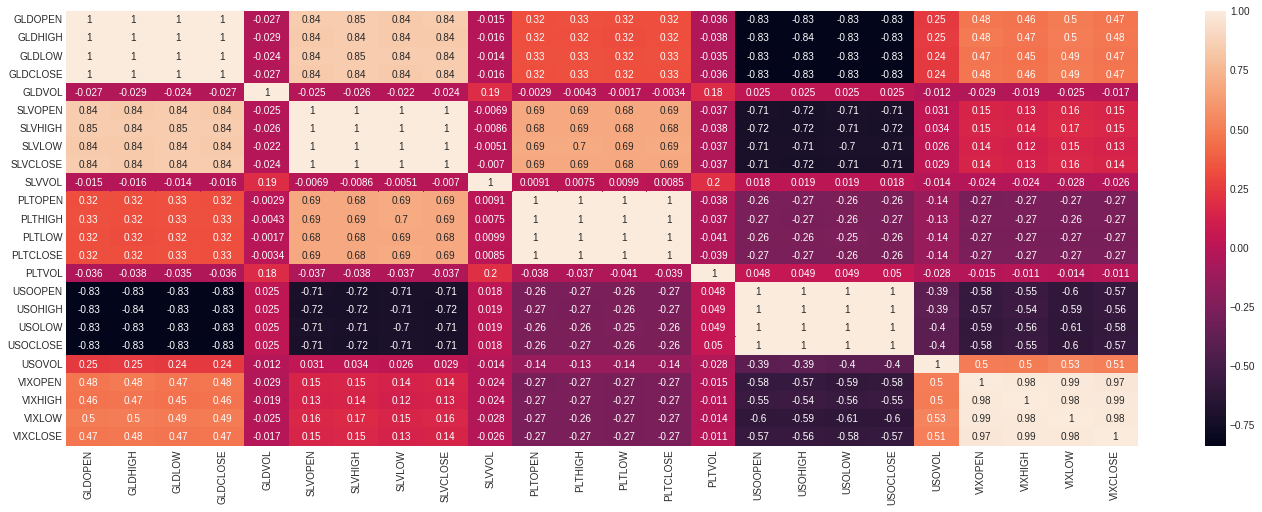

In [ ]:
# Calculate Pearson's correlation
pearson = filteredDF.corr()

plt.figure(figsize=(24,8))
sns.heatmap(pearson, annot=True)

In [ ]:
# Create dataframe containing only Pearson's correlations between GLDCLOSE and other columns
gldClosePearson = pearson.abs().unstack().drop([col for col in pearson.columns if col != 'GLDCLOSE']).sort_values(kind='quicksort', ascending=False)
gldClosePearsonDF = pd.DataFrame(gldClosePearson.values, index=[row[1] for row in gldClosePearson.index], columns=['Pearson'])

# Get list of columns with a low correlation to GLDCLOSE (abs value under 0.5)
weakPearson = [row for row in gldClosePearsonDF.index if gldClosePearsonDF.loc[row]['Pearson'] < 0.5]
print(weakPearson)

['VIXLOW', 'VIXOPEN', 'VIXCLOSE', 'VIXHIGH', 'PLTHIGH', 'PLTCLOSE', 'PLTOPEN', 'PLTLOW', 'USOVOL', 'PLTVOL', 'GLDVOL', 'SLVVOL']


## Cleaning, Testing and Training Data
Before we test and train our data, we first clean it to remove any rows with infinite/NaN values. 

Afterwards, we set up a dataset **X** with the independent features we want to use, dropping the columns with a weak Pearson's correlation, and a dataset **y** which just includes the closing price of gold.

We then split our datasets X and y into training and testing datasets. The training datasets are used to fit our linear regression model

In [ ]:
# Remove rows with any infinite/NaN values
cleanDF = combinedDF[np.isfinite(combinedDF).all(1)]

X = cleanDF.drop(['GLDCLOSE'] + weakPearson, axis=1)
y = cleanDF[['GLDCLOSE']]

# Split the data into train and test dataset
t = .8
t = int(t*len(cleanDF))

# Train dataset
X_train = X[:t]
y_train = y[:t]

# Test dataset
X_test = X[t:]
y_test = y[t:]



In [ ]:
# Create a linear regression model
linear = LinearRegression().fit(X_train, y_train)


Equation for the linear regression:


H(x) = W0 + W(1) * X(1) + W(2) * X(2)...........+ W(N-1) * X(N-1) + W(N) * X(N)

W(0), W(1), W(2), W(3)............W(N) are the weights model has to learn.

where X(0), X(1)............X(N) are the feature variables.


### Comparing Predictions
With our linear regression model trained, we can now try predicting the closing price of gold on our test datasets and plot the results to compare the predicted prices against the actual prices.

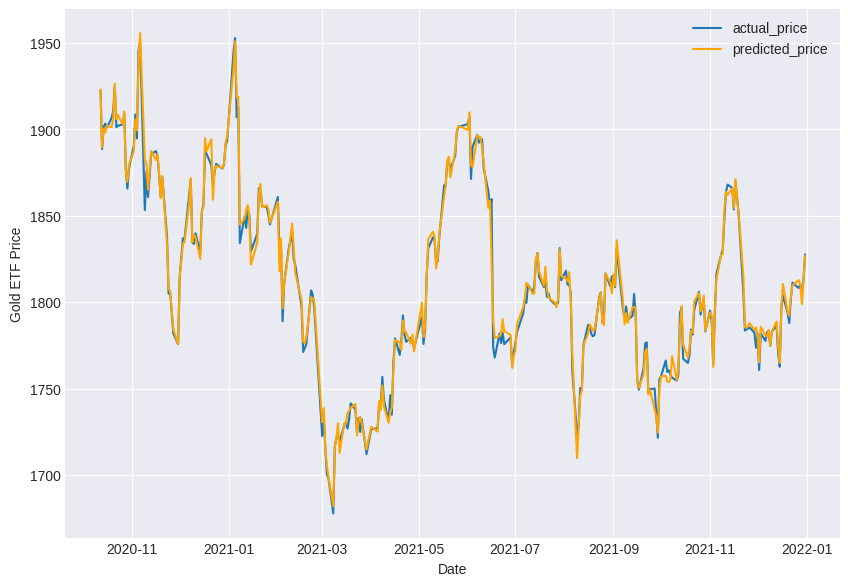

In [ ]:
# Predicting the Gold ETF prices
predicted_price = linear.predict(X_test)
predicted_price_df = pd.DataFrame(predicted_price, index=y_test.index, columns=['price'])
plt.figure(figsize=(10, 7), dpi=100)
plt.plot(y_test, label='Actual Price')
plt.plot(predicted_price_df, color='orange', label='Predicted Price')
plt.legend(['actual_price', 'predicted_price'])
plt.xlabel('Date')
plt.ylabel("Gold ETF Price")
plt.show()

As you can see, the linear regression model performs well given the features we used to train it.



Predicting today's closing price:

In [ ]:
currentGldDF = yf.download('GC=F','2022-11-28',auto_adjust=True) # gold
currentSlvDF = yf.download('SI=F','2022-11-28', auto_adjust=True) # silver
currentPltDF = yf.download('PL=F','2022-11-28', auto_adjust=True) # platinum
currentUsoDF = yf.download('USO','2022-11-28', auto_adjust=True) # US oil
currentVixDF = yf.download('^VIX','2022-11-28', auto_adjust=True) # volatility index
currentUsdDF = yf.download('DX-Y.NYB','2022-11-28', auto_adjust=True) # USD index
print("\nCurrent acutal price:",str(currentGldDF.Close.values[0]))
currentGldDF.columns = ['GLDOPEN','GLDHIGH','GLDLOW','GLDCLOSE','GLDVOL']
currentSlvDF.columns = ['SLVOPEN','SLVHIGH','SLVLOW','SLVCLOSE','SLVVOL']
currentPltDF.columns = ['PLTOPEN','PLTHIGH','PLTLOW','PLTCLOSE','PLTVOL']
currentUsoDF.columns = ['USOOPEN','USOHIGH','USOLOW','USOCLOSE','USOVOL']
currentVixDF.columns = ['VIXOPEN','VIXHIGH','VIXLOW','VIXCLOSE','VIXVOL']
currentUsdDF.columns = ['USDOPEN','USDHIGH','USDLOW','USDCLOSE','USDVOL']
currentCombinedDF = pd.concat([currentGldDF, currentSlvDF, currentPltDF, currentUsoDF, currentVixDF, currentUsdDF], axis=1)
currentCombinedDF.tail()

currentXTest = currentCombinedDF.drop(['GLDCLOSE','VIXLOW', 'VIXOPEN', 'VIXCLOSE', 'VIXHIGH', 'PLTHIGH', 'PLTCLOSE', 'PLTOPEN', 'PLTLOW', 'USOVOL', 'PLTVOL', 'GLDVOL', 'SLVVOL'],axis=1)
currentPredictedPrice = linear.predict(currentXTest)
print("Current predicted price:",currentPredictedPrice[0][0])




[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Current acutal price: 1741.0
Current predicted price: 1736.5882455347612


Evaluation of the Model

Mean Absolute Error (MAE)


MAE gives the average of the absolute differences between predictions and actual values.

In [ ]:
from sklearn.metrics import mean_absolute_error
mean_abs_error = mean_absolute_error(y_test, predicted_price )
float("{0:.2f}".format(mean_abs_error))

3.64

**Mean Squared Error** (MSE)

MSE squares the difference values and then finds the average. It is always going to be greater than MAE.

In [ ]:
from sklearn.metrics import mean_squared_error
mean_sq_error = mean_squared_error(y_test, predicted_price)
float("{0:.2f}".format(mean_sq_error))


27.99

### Calculating R-Squared
Finally, we calculate the R-squared value to see how well our model fits.


R^2 values compares the models predictions with the mean of targets.

In [ ]:
# Calculating R-squared
r2_score = linear.score(X[t:], y[t:])*100
float("{0:.2f}".format(r2_score))

99.06

As expected, our linear regressional model does a great job with a 99% R-squared value.

## Conclusions
Overall, we can use machine learning to help predict results of any dataset given that we can set up the right classifiers or find good features to train and test a predictive model on.

Our linear regression model was highly accurate mainly due to the features we used and filtered out to keep the best ones that would improve the performance of our model. Feaure selection methods definitely helped determine the best features we could use to train our model.